In [1]:
#Importar las librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Cargar el dataset con stats NBA

url = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"

# Extraer todas las tablas de la página
tables = pd.read_html(url)

df = tables[0]

In [3]:
df.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,...,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS
1,2.0,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,...,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,"MVP-3,CPOY-6,AS,NBA1"
2,3.0,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,...,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,"MVP-4,DPOY-9,CPOY-12,AS,NBA1"
3,4.0,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,...,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,"MVP-2,DPOY-7,CPOY-3,AS,NBA1"
4,5.0,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,"MVP-5,CPOY-5,AS,NBA2"


In [4]:
# Eliminar filas y columnas innecesarias
df = df.drop(columns=['Rk', 'Awards'])

In [5]:
df = df.drop(df.index[-1])

In [6]:
df = df[(df['Team'] != '2TM') & (df['Team'] != '3TM')]

In [7]:
#Consutar si existen valores nulos
df.isnull().sum()

Player     0
Age        0
Team       0
Pos        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        8
3P         0
3PA        0
3P%       42
2P         0
2PA        0
2P%       13
eFG%       8
FT         0
FTA        0
FT%       57
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [8]:
# Sustituir los valores nulos
valores_nuevos = {"3P%": 0, "2P%":0, "eFG%":0, "FT%":0, "FG%":0}
df = df.fillna(valores_nuevos)

# Lista de columnas que queremos consultar
columns_to_check = ['3P%', '2P%', 'eFG%', 'FT%', 'FG%']

# Contar valores nulos en esas columnas
df[columns_to_check].isnull().sum()

3P%     0
2P%     0
eFG%    0
FT%     0
FG%     0
dtype: int64

In [9]:
df.head(10)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,0.529,...,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7
1,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,0.487,...,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,0.611,...,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,0.535,...,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1
4,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,0.479,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7
5,Devin Booker,27.0,PHO,PG,68.0,68.0,36.0,9.4,19.2,0.492,...,0.886,0.8,3.7,4.5,6.9,0.9,0.4,2.6,3.0,27.1
6,Kevin Durant,35.0,PHO,PF,75.0,75.0,37.2,10.0,19.1,0.523,...,0.856,0.5,6.1,6.6,5.0,0.9,1.2,3.3,1.8,27.1
7,Jayson Tatum,25.0,BOS,PF,74.0,74.0,35.7,9.1,19.3,0.471,...,0.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9
8,De'Aaron Fox,26.0,SAC,PG,74.0,74.0,35.9,9.7,20.9,0.465,...,0.738,0.9,3.7,4.6,5.6,2.0,0.4,2.6,2.6,26.6
9,Donovan Mitchell,27.0,CLE,SG,55.0,55.0,35.3,9.1,19.8,0.462,...,0.865,0.8,4.3,5.1,6.1,1.8,0.5,2.8,2.1,26.6


In [10]:
# DataFrame 150 máximos anotadores para analizar sobre él
# Añadimos nuevas columnas con información relevante para el análisis

df_maximos_anotadores = df[['Player','Pos', 'MP', '3PA', '3P%', '2PA', '2P%', 'FG', 'FGA', 'FG%', 'eFG%', 'PTS']].head(150)
df_maximos_anotadores['PTS_por_minuto'] = (df['PTS'] / df['MP']).round(2)
df_maximos_anotadores['triples_por_minuto'] = (df['3PA'] / df['MP']).round(2)
df_maximos_anotadores['triples_lanzados'] = (df['3PA'] / df['FGA']).round(2)
df_maximos_anotadores['lanzamientos_dos'] = (df['2PA'] / df['FGA']).round(2)
df_maximos_anotadores.fillna(0, inplace=True)

df_maximos_anotadores.head(5)

,Player,Pos,MP,3PA,3P%,2PA,2P%,FG,FGA,FG%,eFG%,PTS,PTS_por_minuto,triples_por_minuto,triples_lanzados,lanzamientos_dos
0,Joel Embiid,C,33.6,3.6,0.388,18.3,0.556,11.5,21.8,0.529,0.561,34.7,1.03,0.11,0.17,0.84
1,Luka Dončić,PG,37.5,10.6,0.382,13.0,0.573,11.5,23.6,0.487,0.573,33.9,0.90,0.28,0.45,0.55
2,Giannis Antetokounmpo,PF,35.2,1.7,0.274,17.1,0.645,11.5,18.8,0.611,0.624,30.4,0.86,0.05,0.09,0.91
3,Shai Gilgeous-Alexander,PG,34.0,3.6,0.353,16.2,0.576,10.6,19.8,0.535,0.567,30.1,0.89,0.11,0.18,0.82
4,Jalen Brunson,PG,35.4,6.8,0.401,14.6,0.516,10.3,21.4,0.479,0.543,28.7,0.81,0.19,0.32,0.68


In [11]:
# Análisis previo del dataset
df_maximos_anotadores.info()
df_maximos_anotadores.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 158
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              150 non-null    object 
 1   Pos                 150 non-null    object 
 2   MP                  150 non-null    float64
 3   3PA                 150 non-null    float64
 4   3P%                 150 non-null    float64
 5   2PA                 150 non-null    float64
 6   2P%                 150 non-null    float64
 7   FG                  150 non-null    float64
 8   FGA                 150 non-null    float64
 9   FG%                 150 non-null    float64
 10  eFG%                150 non-null    float64
 11  PTS                 150 non-null    float64
 12  PTS_por_minuto      150 non-null    float64
 13  triples_por_minuto  150 non-null    float64
 14  triples_lanzados    150 non-null    float64
 15  lanzamientos_dos    150 non-null    float64
dtypes: float64(14

,MP,3PA,3P%,2PA,2P%,FG,FGA,FG%,eFG%,PTS,PTS_por_minuto,triples_por_minuto,triples_lanzados,lanzamientos_dos
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,31.366667,5.264667,0.356280,8.712000,0.540320,6.672000,13.977333,0.478620,0.549913,18.311333,0.578667,0.168533,0.382933,0.617067
std,3.676803,2.227321,0.072896,3.280692,0.050726,1.781189,3.503845,0.052239,0.039574,5.053891,0.117477,0.068467,0.157205,0.157474
min,18.700000,0.000000,0.000000,3.000000,0.416000,3.800000,7.900000,0.385000,0.440000,10.400000,0.360000,0.000000,0.000000,0.280000
25%,29.100000,3.900000,0.339500,6.050000,0.501000,5.100000,11.000000,0.443000,0.522000,14.000000,0.490000,0.130000,0.292500,0.512500
50%,32.200000,5.300000,0.370000,8.100000,0.536000,6.400000,13.600000,0.471000,0.549500,17.150000,0.560000,0.170000,0.390000,0.600000
75%,34.000000,6.800000,0.394000,10.975000,0.573750,7.975000,16.700000,0.499000,0.577500,22.100000,0.667500,0.220000,0.480000,0.707500
max,37.800000,11.800000,0.461000,18.300000,0.729000,11.500000,23.600000,0.661000,0.667000,34.700000,1.030000,0.360000,0.720000,1.000000


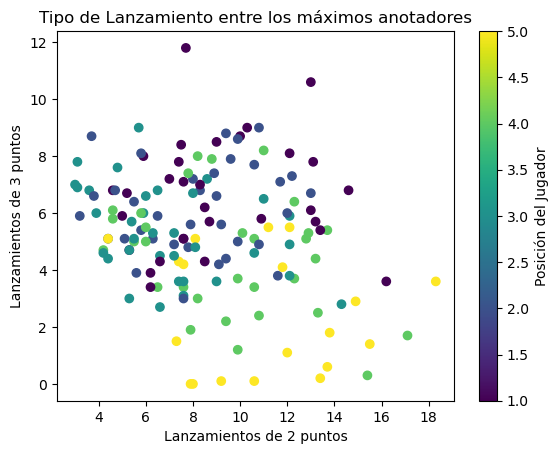

In [15]:
#Generamos una nueva columna para poder trabajar con matplotlib y las posiciones de los jugadores
#Generamos gráfico inicial con matplotlib

posiciones = {'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5}
df_maximos_anotadores['Pos_num'] = df_maximos_anotadores['Pos'].map(posiciones).round()

# Graficar
X = df_maximos_anotadores['2PA']
y = df_maximos_anotadores['3PA']

plt.scatter(X, y, c=df_maximos_anotadores['Pos_num'], cmap='viridis')
plt.xlabel('Lanzamientos de 2 puntos')
plt.ylabel('Lanzamientos de 3 puntos')
plt.title('Tipo de Lanzamiento entre los máximos anotadores')
plt.colorbar(label="Posición del Jugador") 

Text(0.5, 1.02, 'Relaciones clave entre métricas de anotación')

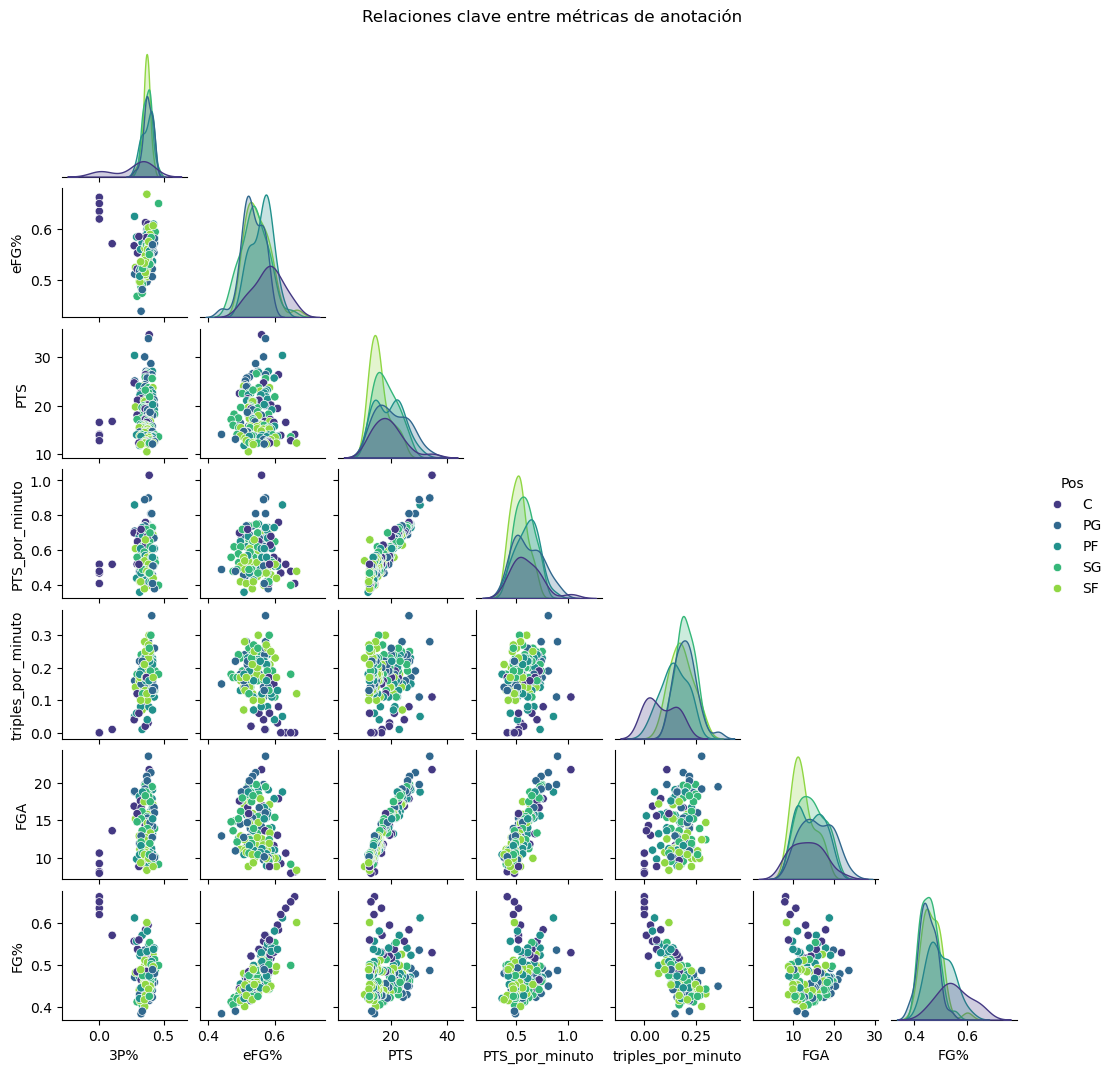

In [19]:
# Utilizamos Seaborn para tener una visión previa de las relaciones entre variables
vars_optimas = ['3P%', 'eFG%', 'PTS', 'PTS_por_minuto', 'triples_por_minuto', 'FGA', 'FG%', 'Pos']
sns.pairplot(data=df_maximos_anotadores[vars_optimas],
             hue="Pos",
             corner=True,
             palette='viridis',
             height=1.5)
plt.suptitle("Relaciones clave entre métricas de anotación", y=1.02)


<Axes: xlabel='3PA', ylabel='PTS'>

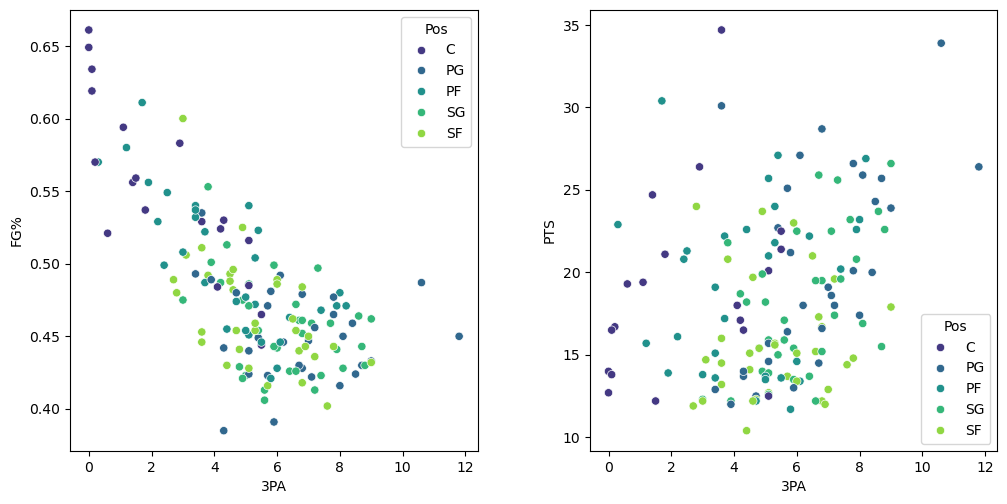

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.tight_layout(w_pad=5)

# Primer JGráfico
sns.scatterplot(data=df_maximos_anotadores,
             x="3PA",
             y="FG%",
             hue="Pos",
             palette="viridis", ax=axes[0])
# Segundo Gráfico
sns.scatterplot(data=df_maximos_anotadores,
             x="3PA",
             y="PTS",
             hue="Pos",
             palette="viridis", ax=axes[1])

<Axes: xlabel='2PA', ylabel='PTS'>

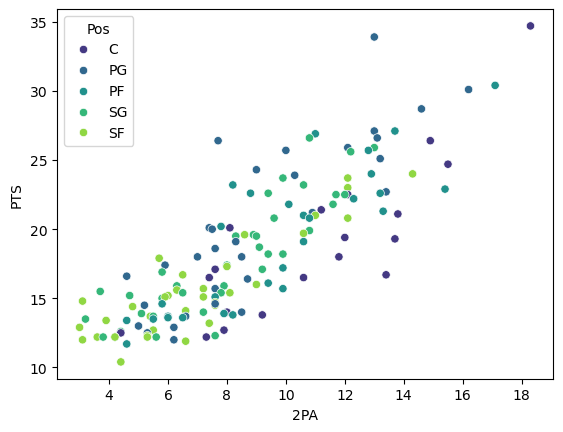

In [21]:
sns.scatterplot(data=df_maximos_anotadores,
             x="2PA",
             y="PTS",
             hue="Pos",
             palette="viridis")

Text(0.5, 1.0, 'Relación entre tiros de 3 y eficiencia en el lanzamiento')

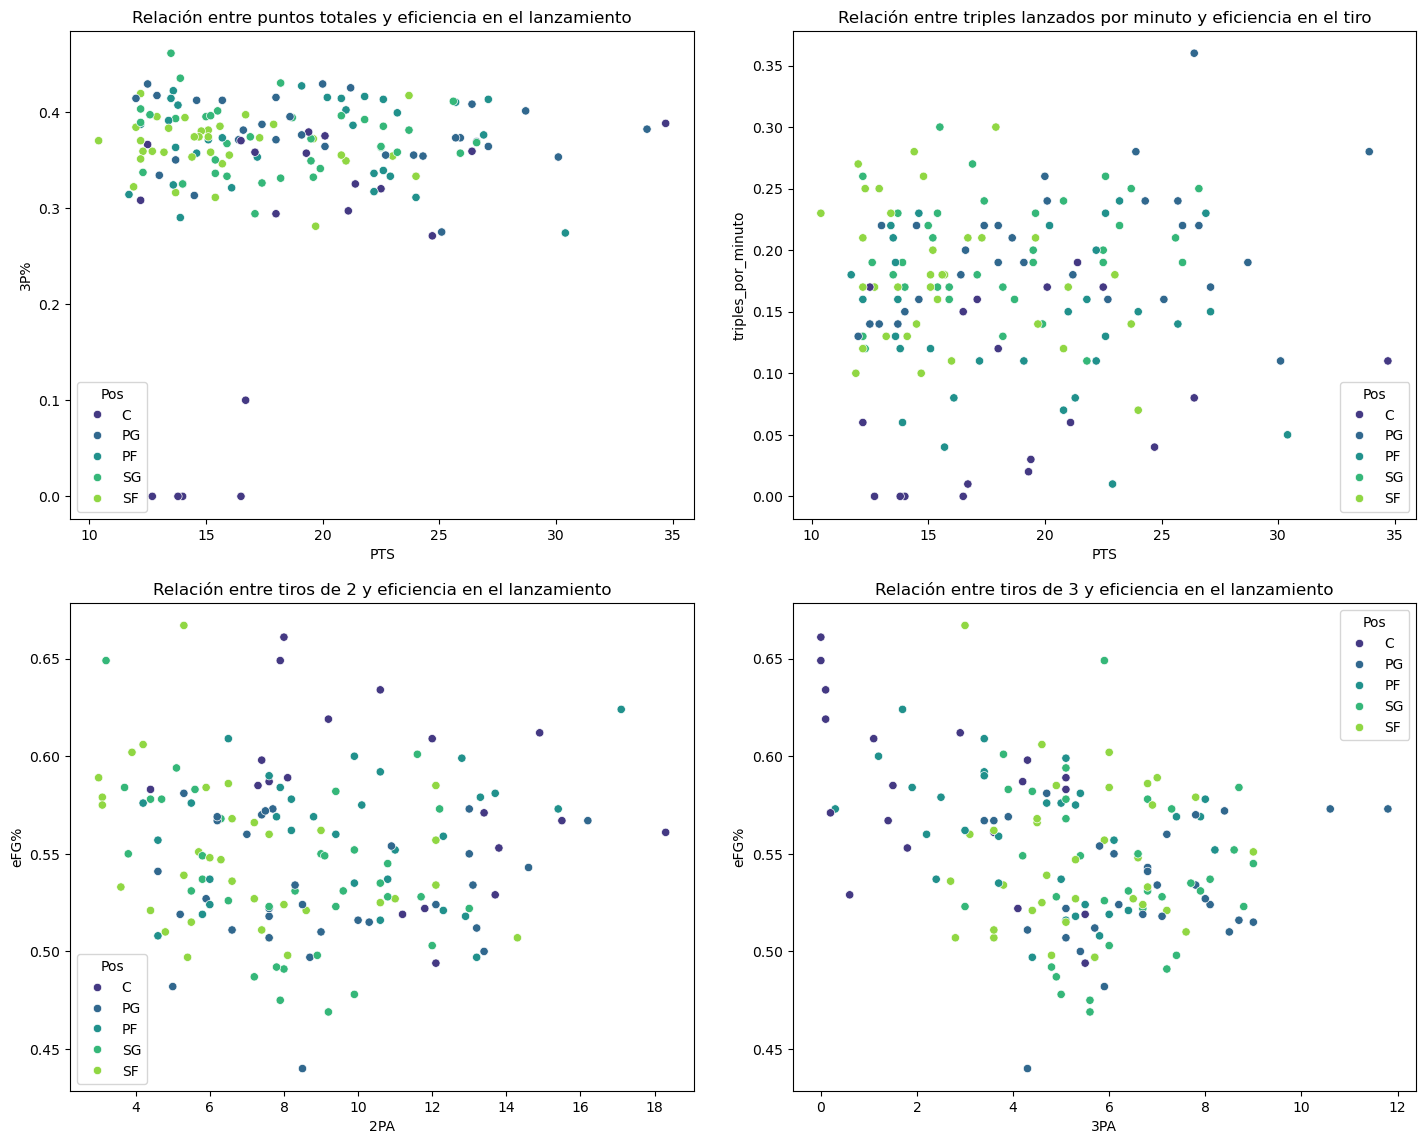

In [14]:
# Crear una figura con 2 filas y 2 columnas (4 axes en total)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plt.tight_layout(pad=4)

# Gráfico 1: 
sns.scatterplot(
    data=df_maximos_anotadores,
    x="PTS",
    y="3P%",
    hue="Pos",
    palette="viridis",
    ax=axes[0, 0]  
)
axes[0, 0].set_title("Relación entre puntos totales y eficiencia en el lanzamiento")

# Gráfico 2: 
sns.scatterplot(
    data=df_maximos_anotadores,
    x="PTS",
    y="triples_por_minuto",
    hue="Pos",
    palette="viridis",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Relación entre triples lanzados por minuto y eficiencia en el tiro")

# Gráfico 3: 
sns.scatterplot(
    data=df_maximos_anotadores,
    x="2PA",
    y="eFG%",
    hue="Pos",
    palette="viridis",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Relación entre tiros de 2 y eficiencia en el lanzamiento")

# Gráfico 4: 
sns.scatterplot(
    data=df_maximos_anotadores,
    x="3PA",
    y="eFG%",
    hue="Pos",
    palette="viridis",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Relación entre tiros de 3 y eficiencia en el lanzamiento")

Text(0.5, 1.0, 'Puntos')

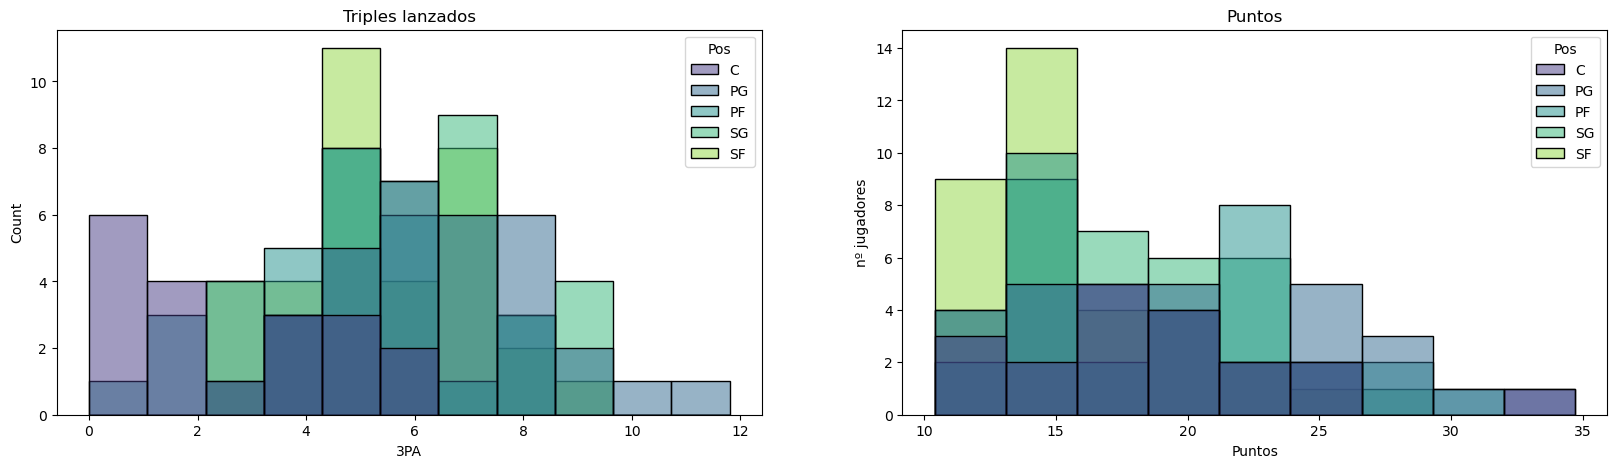

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=df_maximos_anotadores,
    x="3PA",
    hue="Pos",
    palette="viridis", ax=axes[0])
plt.ylabel("nº jugadores")
axes[0].set_title("Triples lanzados")



sns.histplot(data=df_maximos_anotadores,
    x="PTS",
    hue="Pos",
    palette="viridis", ax=axes[1] )
plt.xlabel("Puntos")
axes[1].set_title("Puntos")



Text(0.5, 1.0, 'Lanzamientos de 2 puntos')

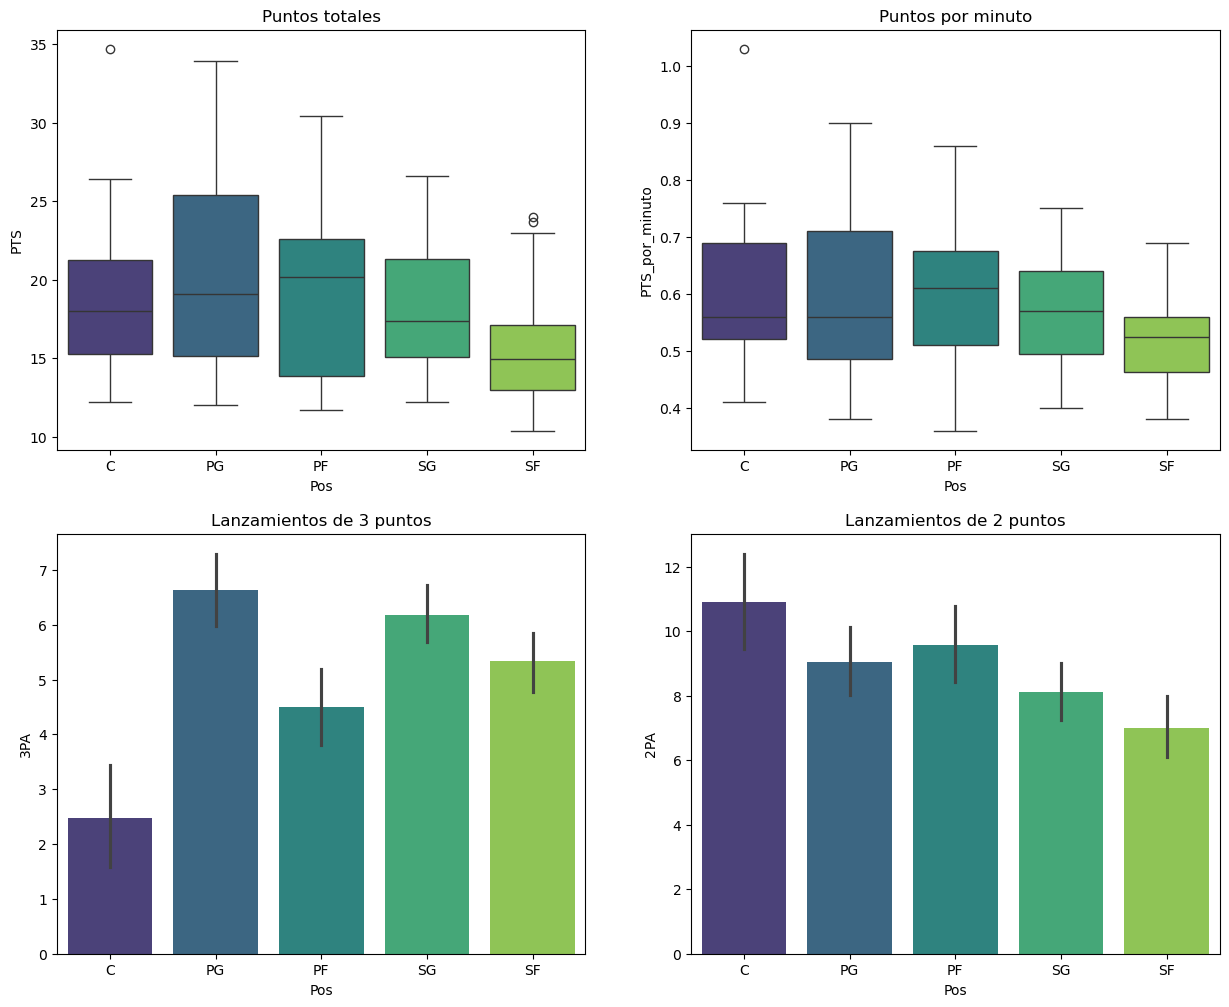

In [47]:
# Crear una figura con 2 filas y 2 columnas (4 axes en total)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

#Gráfico 1
sns.boxplot(data=df_maximos_anotadores,
    x="Pos",
    y="PTS",
    hue="Pos",
    palette="viridis",
    ax=axes[0, 0])
axes[0, 0].set_title("Puntos totales")


#Gráfico 2
sns.boxplot(data=df_maximos_anotadores,
    x="Pos",
    y="PTS_por_minuto",
    hue="Pos",
    palette="viridis",
    ax=axes[0, 1])
axes[0, 1].set_title("Puntos por minuto")

# Gráfico 3: 
sns.barplot(
    data=df_maximos_anotadores,
    x="Pos",
    y="3PA",
    hue="Pos",
    palette="viridis",
    ax=axes[1, 0])
axes[1, 0].set_title("Lanzamientos de 3 puntos")


# Gráfico 4: 
sns.barplot(
    data=df_maximos_anotadores,
    x="Pos",
    y="2PA",
    hue="Pos",
    palette="viridis",
    ax=axes[1, 1])
axes[1, 1].set_title("Lanzamientos de 2 puntos")


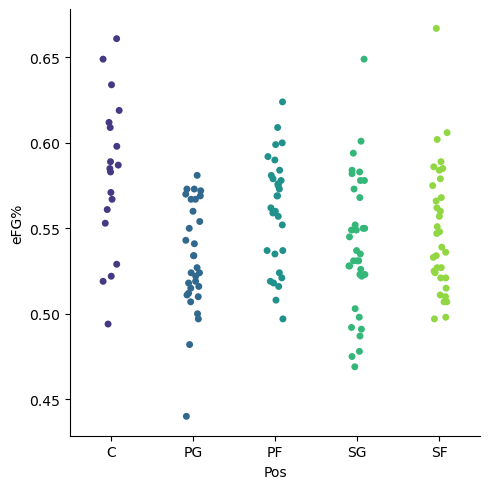

In [43]:
sns.catplot(data=df_maximos_anotadores,
    x="Pos",
    y="eFG%",
    hue="Pos",
    palette="viridis")

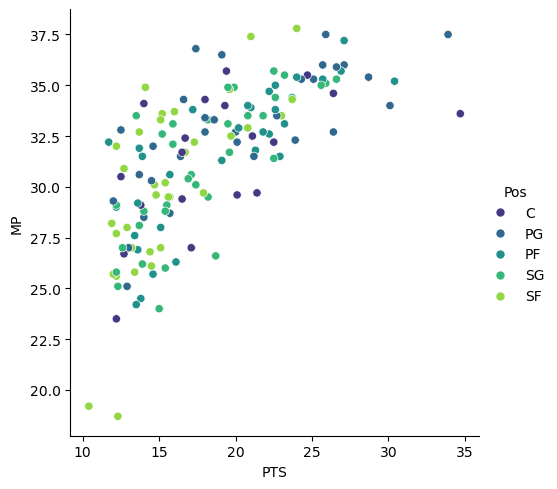

In [45]:
sns.relplot(data=df_maximos_anotadores,
    x="PTS",
    y="MP",
    hue="Pos",
    palette="viridis")

En el documento adjunto en Word se puede encontrar el análisis realizado a partir de estas visualizaciones